# Generating Convergence Plots in EAGO 

[Matthew Wilhelm](https://psor.uconn.edu/person/matthew-wilhelm/)  
Department of Chemical and Biomolecular Engineering, University of Connecticut

### Importance of convergence plots

Convergence plots for numerical methods can be rather informative when comparing multiple solution methods[1]. Faster convergence is generally desired and both the short term and long term behavior can be informative. For instance, a quick contraction of the global bounds initially may illustrate that domain reduction routines were particularly effective while slow convergence in the limit may indicate that the relaxation scheme used has a poor convergence order.

In this notebook, we illustrate how to generate plots of bounds and node count versus solution time and iteration numbers.

### Setting up a sample problem

In the below example, we solve the classic three-hump camel problem[2] shifted by 15.0 using EAGO's default optimizer. The shifted problem is used as we'll be interested in generating a relative gap plot later and the optimal objective value of the original three-hump is too close to zero for this metric to be useful.

In [1]:
using JuMP, EAGO
using Plots
pyplot()

model = Model(with_optimizer(EAGO.Optimizer))

@variable(model, -5 <= x <= 5)
@variable(model, -5 <= y <= 5)
@NLobjective(model, Min, 2*x^2-1.05*x^4+(x^6)/6+x*y+y^2 + 15.0)

status = JuMP.optimize!(model)

Node ID: 1, Lower Bound: -Inf, Lower Variable Bounds:
             [-5.0, -5.0], Upper Variable Bounds: [5.0, 5.0]
started initial preprocessing
finished initial preprocessing
finished initial lower problem

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

finished initial upper problem
finished initial postprocessing
Lower Bound (First Iteration): -716.25, Solution: [5.0, 5.0], Feasibility: true
Lower Bound (Last Iteration): -716.25, Solution: [5.0, 5.0], Feasibility: true
Upper Bound: 15.0, Solution: [0.0, 0.0], Feasibility: true
Iteration   NodeID    Current_LBD     Global_LBD     Global_UBD      NodesLeft     Absolute_Gap    Absolute_Ratio     LBD_Fe

Lower Bound (Last Iteration): -4.042656697954272, Solution: [-2.65625, 1.09375], Feasibility: true
Upper Bound: 33.617208102125204, Solution: [-2.65625, 1.32814], Feasibility: true
    16,       17,      -4.0426567,     -467.0396717,     15.0000000,          17,        482.0396717,       32.1359781,        true,       true
Node ID: 24, Lower Bound: -467.0396717255185, Lower Variable Bounds:
             [-5.0, 1.09375], Upper Variable Bounds: [-3.53516, 2.55859]
Lower Bound (First Iteration): -160.2016599236481, Solution: [-3.53516, 2.55859], Feasibility: true
Lower Bound (Last Iteration): -160.2016599236481, Solution: [-3.53516, 2.55859], Feasibility: true
Upper Bound: 198.19018319636317, Solution: [-3.53516, 1.76759], Feasibility: true
    17,       18,      -160.2016599,     -467.0396717,     15.0000000,          18,        482.0396717,       32.1359781,        true,       true
Node ID: 22, Lower Bound: -466.53422433782316, Lower Variable Bounds:
             [-5.0, 2.55859], Upper 

    31,       32,      -396.4161332,     -401.2928422,     15.0000000,          32,        416.2928422,       27.7528561,        true,       true
Node ID: 6, Lower Bound: -401.2928422292074, Lower Variable Bounds:
             [1.25, -5.0], Upper Variable Bounds: [5.0, -1.25]
Lower Bound (First Iteration): -398.5584672292074, Solution: [1.25, -1.25], Feasibility: true
Lower Bound (Last Iteration): -398.5584672292074, Solution: [1.25, -1.25], Feasibility: true
Upper Bound: 15.43464637944334, Solution: [1.77632, -1.25001], Feasibility: true
    32,       33,      -398.5584672,     -401.2928422,     15.0000000,          33,        416.2928422,       27.7528561,        true,       true
Node ID: 61, Lower Bound: -401.2928422292074, Lower Variable Bounds:
             [1.25, 1.09375], Upper Variable Bounds: [5.0, 5.0]
Lower Bound (First Iteration): -410.9425004323324, Solution: [1.25, 1.09375], Feasibility: true
Lower Bound (Last Iteration): -410.9425004323324, Solution: [1.25, 1.09375], Fea

Upper Bound: 198.45814642642256, Solution: [3.53516, -1.24993], Feasibility: true
    47,       48,      -159.2505605,     -396.4161332,     15.0000000,          48,        411.4161332,       27.4277422,        true,       true
Node ID: 68, Lower Bound: -393.0158074696859, Lower Variable Bounds:
             [1.25, 1.09375], Upper Variable Bounds: [2.65625, 2.55859]
Lower Bound (First Iteration): 5.867632761061637, Solution: [1.25, 1.09375], Feasibility: true
Lower Bound (Last Iteration): 5.867632761061637, Solution: [1.25, 1.09375], Feasibility: true
Upper Bound: 18.760786470151913, Solution: [1.25, 1.09375], Feasibility: true
    48,       49,      5.8676328,     -393.0158075,     15.0000000,          49,        408.0158075,       27.2010538,        true,       true
Node ID: 69, Lower Bound: -393.0158074696859, Lower Variable Bounds:
             [2.65625, 1.09375], Upper Variable Bounds: [5.0, 2.55859]
Lower Bound (First Iteration): -461.2291248505185, Solution: [2.65625, 1.09375], 

Upper Bound: 198.64426847807917, Solution: [-3.53516, 1.09372], Feasibility: true
    66,       57,      -159.1716917,     -159.0644033,     15.0000000,          57,        174.0644033,       11.6042936,        true,       true
Node ID: 122, Lower Bound: -159.06440330133364, Lower Variable Bounds:
             [-5.0, 0.214844], Upper Variable Bounds: [-4.08447, 1.09375]
Lower Bound (First Iteration): -Inf, Solution: [-3.53516, 1.09375], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-3.53516, 1.09375], Feasibility: false
    67,       56,      Inf,     -159.0644033,     15.0000000,          56,        174.0644033,       11.6042936,        false,       true
Node ID: 28, Lower Bound: -159.06440330133364, Lower Variable Bounds:
             [-5.0, -1.25], Upper Variable Bounds: [-3.53516, 0.214844]
Lower Bound (First Iteration): -156.27061439142153, Solution: [-3.53516, 0.214844], Feasibility: true
Lower Bound (Last Iteration): -156.27061439142153, Solution: [-3.53516, 

             [-5.0, 3.47412], Upper Variable Bounds: [-4.08447, 4.04633]
Lower Bound (First Iteration): -Inf, Solution: [-3.53516, 4.04633], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-3.53516, 4.04633], Feasibility: false
    87,       46,      Inf,     -155.3147222,     15.0000000,          46,        170.3147222,       11.3543148,        false,       true
Node ID: 133, Lower Bound: -153.1798398673959, Lower Variable Bounds:
             [-4.08447, 4.04633], Upper Variable Bounds: [-3.53516, 5.0]
Lower Bound (First Iteration): -Inf, Solution: [-3.53516, 4.04633], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-3.53516, 4.04633], Feasibility: false
    88,       45,      Inf,     -153.1798399,     15.0000000,          45,        168.1798399,       11.2119893,        false,       true
Node ID: 132, Lower Bound: -153.1798398673959, Lower Variable Bounds:
             [-5.0, 4.04633], Upper Variable Bounds: [-4.08447, 5.0]
Lower Bound (First Iter

Lower Bound (First Iteration): -36.07953950409865, Solution: [-2.65625, -1.25], Feasibility: true
Lower Bound (Last Iteration): -36.07953950409865, Solution: [-2.65625, -1.25], Feasibility: true
Upper Bound: 15.000000000000076, Solution: [-1.92489e-7, -1.24377e-8], Feasibility: true
   108,       35,      -36.0795395,     -59.7306626,     15.0000000,          35,        74.7306626,       4.9820442,        true,       true
Node ID: 15, Lower Bound: -59.73066255097365, Lower Variable Bounds:
             [-2.65625, 1.09375], Upper Variable Bounds: [1.25, 5.0]
Lower Bound (First Iteration): -51.21625825409865, Solution: [-2.65625, 1.09375], Feasibility: true
Lower Bound (Last Iteration): -51.21625825409865, Solution: [-2.65625, 1.09375], Feasibility: true
Upper Bound: 15.345098844398935, Solution: [-1.76487, 1.09376], Feasibility: true
   109,       36,      -51.2162583,     -59.7306626,     15.0000000,          36,        74.7306626,       4.9820442,        true,       true
Node ID: 144,

             [-3.53516, 1.64307], Upper Variable Bounds: [-2.98584, 1.98639]
Lower Bound (First Iteration): -Inf, Solution: [-2.65625, 1.98639], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-2.65625, 1.98639], Feasibility: false
Iteration   NodeID    Current_LBD     Global_LBD     Global_UBD      NodesLeft     Absolute_Gap    Absolute_Ratio     LBD_Feas     UBD_Feas
   140,       45,      Inf,     -3.4914261,     15.0000000,          45,        18.4914261,       5.2962388,        false,       true
Node ID: 183, Lower Bound: -3.491426074567472, Lower Variable Bounds:
             [-2.98584, 1.64307], Upper Variable Bounds: [-2.65625, 1.98639]
Lower Bound (First Iteration): -Inf, Solution: [-2.65625, 1.98639], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-2.65625, 1.98639], Feasibility: false
   141,       44,      Inf,     -3.4914261,     15.0000000,          44,        18.4914261,       5.2962388,        false,       true
Node ID: 185, Lower Bo

   166,       43,      Inf,     -1.1661814,     15.0000000,          43,        16.1661814,       13.8624933,        false,       true
Node ID: 200, Lower Bound: -1.1661813609928249, Lower Variable Bounds:
             [-3.53516, 2.90192], Upper Variable Bounds: [-2.98584, 3.47412]
Lower Bound (First Iteration): -Inf, Solution: [2.65625, 0.521545], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [2.65625, 0.521545], Feasibility: false
   167,       42,      Inf,     -1.1661814,     15.0000000,          42,        16.1661814,       13.8624933,        false,       true
Node ID: 197, Lower Bound: -1.0064631483212452, Lower Variable Bounds:
             [-3.53516, -0.677795], Upper Variable Bounds: [-2.65625, -0.334473]
Lower Bound (First Iteration): -0.8263831973702056, Solution: [-2.65625, -0.334473], Feasibility: true
Lower Bound (Last Iteration): -0.8263831973702056, Solution: [-2.65625, -0.334473], Feasibility: true
Upper Bound: 36.381442364283146, Solution: [-2.65625

Upper Bound: 18.040233390861726, Solution: [-1.85415, 2.55859], Feasibility: true
   199,       54,      11.8129400,     1.7177842,     15.0000000,          54,        13.2822158,       7.7321794,        true,       true
Node ID: 103, Lower Bound: 1.7678901770457287, Lower Variable Bounds:
             [2.65625, 1.64307], Upper Variable Bounds: [3.53516, 2.55859]
Lower Bound (First Iteration): 5.057284257684614, Solution: [2.65625, 1.64307], Feasibility: true
Lower Bound (Last Iteration): 5.057284257684614, Solution: [2.65625, 1.64307], Feasibility: true
Upper Bound: 42.44518961323546, Solution: [2.65625, 1.64307], Feasibility: true
Iteration   NodeID    Current_LBD     Global_LBD     Global_UBD      NodesLeft     Absolute_Gap    Absolute_Ratio     LBD_Feas     UBD_Feas
   200,       55,      5.0572843,     1.7678902,     15.0000000,          55,        13.2321098,       7.4846899,        true,       true
Node ID: 102, Lower Bound: 1.7678901770457287, Lower Variable Bounds:
           

             [1.77734, -0.371094], Upper Variable Bounds: [2.65625, 0.178223]
Lower Bound (First Iteration): 6.109775808619368, Solution: [1.77734, -0.371094], Feasibility: true
Lower Bound (Last Iteration): 6.109775808619368, Solution: [1.77734, -0.371094], Feasibility: true
Upper Bound: 15.571985401229556, Solution: [1.77735, -0.371092], Feasibility: true
   218,       65,      6.1097758,     3.4390043,     15.0000000,          65,        11.5609957,       3.3617277,        true,       true
Node ID: 274, Lower Bound: 3.4390042567853616, Lower Variable Bounds:
             [1.25, -0.371094], Upper Variable Bounds: [1.77734, 0.178223]
Lower Bound (First Iteration): 14.203488106055966, Solution: [1.77734, -0.371094], Feasibility: true
Lower Bound (Last Iteration): 14.203488106055966, Solution: [1.77734, -0.371094], Feasibility: true
Upper Bound: 15.540073547279537, Solution: [1.70076, -0.371092], Feasibility: true
   219,       66,      14.2034881,     3.4390043,     15.0000000,        

             [-2.65625, 3.47412], Upper Variable Bounds: [-1.19141, 4.04633]
Lower Bound (First Iteration): 6.277827667025029, Solution: [-2.65625, 3.47412], Feasibility: true
Lower Bound (Last Iteration): 6.277827667025029, Solution: [-2.65625, 3.47412], Feasibility: true
Upper Bound: 21.845831544129716, Solution: [-1.89664, 3.47412], Feasibility: true
   237,       72,      6.2778277,     5.7776056,     15.0000000,          72,        9.2223944,       1.5962312,        true,       true
Node ID: 288, Lower Bound: 5.81075690524159, Lower Variable Bounds:
             [-3.53516, 4.40395], Upper Variable Bounds: [-2.98584, 5.0]
Lower Bound (First Iteration): -Inf, Solution: [-2.65625, 3.47412], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-2.65625, 3.47412], Feasibility: false
   238,       71,      Inf,     5.8107569,     15.0000000,          71,        9.1892431,       1.5814193,        false,       true
Node ID: 289, Lower Bound: 5.81075690524159, Lower Variable B

Upper Bound: 22.157802800050607, Solution: [1.89924, -3.53516], Feasibility: true
Iteration   NodeID    Current_LBD     Global_LBD     Global_UBD      NodesLeft     Absolute_Gap    Absolute_Ratio     LBD_Feas     UBD_Feas
   260,       69,      8.1185502,     7.6575456,     15.0000000,          69,        7.3424544,       0.9588522,        true,       true
Node ID: 228, Lower Bound: 7.657545564422133, Lower Variable Bounds:
             [1.25, -5.0], Upper Variable Bounds: [2.65625, -4.08447]
Lower Bound (First Iteration): 10.710905251750471, Solution: [2.65625, -4.08447], Feasibility: true
Lower Bound (Last Iteration): 10.710905251750471, Solution: [2.65625, -4.08447], Feasibility: true
Upper Bound: 25.293894380833137, Solution: [1.92155, -4.08447], Feasibility: true
   261,       70,      10.7109053,     7.6575456,     15.0000000,          70,        7.3424544,       0.9588522,        true,       true
Node ID: 324, Lower Bound: 7.824184089878607, Lower Variable Bounds:
             [

Lower Bound (Last Iteration): -Inf, Solution: [-1.74072, -1.25], Feasibility: false
   286,       75,      Inf,     9.7718852,     15.0000000,          75,        5.2281148,       0.5350160,        false,       true
Node ID: 319, Lower Bound: 9.771885183619368, Lower Variable Bounds:
             [2.10693, 1.09375], Upper Variable Bounds: [2.65625, 1.64307]
Lower Bound (First Iteration): -Inf, Solution: [-1.74072, -1.25], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-1.74072, -1.25], Feasibility: false
   287,       74,      Inf,     9.7718852,     15.0000000,          74,        5.2281148,       0.5350160,        false,       true
Node ID: 360, Lower Bound: 9.977704374341958, Lower Variable Bounds:
             [-2.65625, -1.77734], Upper Variable Bounds: [-2.08405, -1.25]
Lower Bound (First Iteration): -Inf, Solution: [-1.74072, -1.25], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-1.74072, -1.25], Feasibility: false
   288,       73,      In

Upper Bound: 16.65851495967572, Solution: [-2.10693, 1.09378], Feasibility: true
   305,       84,      11.2208200,     10.7598153,     15.0000000,          84,        4.2401847,       0.3940760,        true,       true
Node ID: 262, Lower Bound: 10.762117523841159, Lower Variable Bounds:
             [-2.10693, -1.25], Upper Variable Bounds: [-1.19141, -0.334473]
Lower Bound (First Iteration): 12.312099058322207, Solution: [-2.10693, -0.334473], Feasibility: true
Lower Bound (Last Iteration): 12.312099058322207, Solution: [-2.10693, -0.334473], Feasibility: true
Upper Bound: 16.681920249444083, Solution: [-1.59616, -0.334473], Feasibility: true
   306,       85,      12.3120991,     10.7621175,     15.0000000,          85,        4.2378825,       0.3937778,        true,       true
Node ID: 263, Lower Bound: 10.762117523841159, Lower Variable Bounds:
             [-2.10693, -0.334473], Upper Variable Bounds: [-1.19141, 0.214844]
Lower Bound (First Iteration): 11.22312219827582, Solutio

Upper Bound: 17.527235904407515, Solution: [-2.10693, 1.98639], Feasibility: true
   324,       89,      12.0831240,     11.4327145,     15.0000000,          89,        3.5672855,       0.3120244,        true,       true
Node ID: 386, Lower Bound: 11.432714527144022, Lower Variable Bounds:
             [-2.65625, 1.64307], Upper Variable Bounds: [-2.10693, 1.98639]
Lower Bound (First Iteration): 11.612794478095061, Solution: [-2.10693, 1.64307], Feasibility: true
Lower Bound (Last Iteration): 11.612794478095061, Solution: [-2.10693, 1.64307], Feasibility: true
Upper Bound: 17.004519483667526, Solution: [-2.10693, 1.64307], Feasibility: true
   325,       90,      11.6127945,     11.4327145,     15.0000000,          90,        3.5672855,       0.3120244,        true,       true
Node ID: 264, Lower Bound: 11.461481218828744, Lower Variable Bounds:
             [-2.65625, -1.25], Upper Variable Bounds: [-2.10693, -0.334473]
Lower Bound (First Iteration): 13.011462753309793, Solution: [-2.

Lower Bound (First Iteration): -Inf, Solution: [2.12891, -0.714417], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [2.12891, -0.714417], Feasibility: false
   347,       80,      Inf,     11.8257421,     15.0000000,          80,        3.1742579,       0.2684193,        false,       true
Node ID: 418, Lower Bound: 11.922485893263406, Lower Variable Bounds:
             [-2.65625, -0.334473], Upper Variable Bounds: [-2.31293, 0.214844]
Lower Bound (First Iteration): -Inf, Solution: [2.12891, -0.714417], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [2.12891, -0.714417], Feasibility: false
   348,       79,      Inf,     11.9224859,     15.0000000,          79,        3.0775141,       0.2581269,        false,       true
Node ID: 419, Lower Bound: 11.922485893263406, Lower Variable Bounds:
             [-2.31293, -0.334473], Upper Variable Bounds: [-2.10693, 0.214844]
Lower Bound (First Iteration): -Inf, Solution: [2.12891, -0.714417], Feasibility: fa

Iteration   NodeID    Current_LBD     Global_LBD     Global_UBD      NodesLeft     Absolute_Gap    Absolute_Ratio     LBD_Feas     UBD_Feas
   380,       67,      12.3794342,     12.6734043,     15.0000000,          67,        2.3265957,       0.1835810,        true,       true
Node ID: 447, Lower Bound: 12.673404340370828, Lower Variable Bounds:
             [-0.619202, -0.371094], Upper Variable Bounds: [0.334473, 1.09375]
Lower Bound (First Iteration): 14.232977021086532, Solution: [0.334473, -0.371094], Feasibility: true
Lower Bound (Last Iteration): 14.232977021086532, Solution: [0.334473, -0.371094], Feasibility: true
Upper Bound: 15.000000000009289, Solution: [-1.51442e-6, 3.05397e-6], Feasibility: true
   381,       68,      14.2329770,     12.6734043,     15.0000000,          68,        2.3265957,       0.1835810,        true,       true
Node ID: 336, Lower Bound: 12.673404340370828, Lower Variable Bounds:
             [-1.19141, -1.25], Upper Variable Bounds: [0.334473, -0.37

   413,       64,      Inf,     13.7637871,     15.0000000,          64,        1.2362129,       0.0898163,        false,       true
Node ID: 370, Lower Bound: 13.795093020635516, Lower Variable Bounds:
             [1.25, -1.25], Upper Variable Bounds: [1.79932, -0.92041]
Lower Bound (First Iteration): 13.838745972352893, Solution: [1.79932, -0.92041], Feasibility: true
Lower Bound (Last Iteration): 13.838745972352893, Solution: [1.79932, -0.92041], Feasibility: true
Upper Bound: 15.300726719778789, Solution: [1.75135, -0.920437], Feasibility: true
   414,       65,      13.8387460,     13.7950930,     15.0000000,          65,        1.2049070,       0.0873432,        true,       true
Node ID: 371, Lower Bound: 13.795093020635516, Lower Variable Bounds:
             [1.25, -0.92041], Upper Variable Bounds: [1.79932, -0.371094]
Lower Bound (First Iteration): 13.790466210084826, Solution: [1.79932, -0.92041], Feasibility: true
Lower Bound (Last Iteration): 13.790466210084826, Solution: 

Lower Bound (Last Iteration): 14.397527926078547, Solution: [-1.76361, 0.558167], Feasibility: true
Upper Bound: 15.404932878946074, Solution: [-1.76362, 0.558163], Feasibility: true
   437,       64,      14.3975279,     14.0720639,     15.0000000,          64,        0.9279361,       0.0659417,        true,       true
Node ID: 439, Lower Bound: 14.10144725439887, Lower Variable Bounds:
             [2.10693, 1.98639], Upper Variable Bounds: [2.65625, 2.55859]
Lower Bound (First Iteration): -Inf, Solution: [-1.76361, 0.558167], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-1.76361, 0.558167], Feasibility: false
   438,       63,      Inf,     14.1014473,     15.0000000,          63,        0.8985527,       0.0637206,        false,       true
Node ID: 438, Lower Bound: 14.10144725439887, Lower Variable Bounds:
             [1.77734, 1.98639], Upper Variable Bounds: [2.10693, 2.55859]
Lower Bound (First Iteration): -Inf, Solution: [-1.76361, 0.558167], Feasibility: 

   465,       68,      Inf,     14.2683169,     15.0000000,          68,        0.7316831,       0.0512803,        false,       true
Node ID: 513, Lower Bound: 14.280392444232753, Lower Variable Bounds:
             [-2.31293, -0.892372], Upper Variable Bounds: [-2.10693, -0.677795]
Lower Bound (First Iteration): -Inf, Solution: [-1.89236, 0.76416], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-1.89236, 0.76416], Feasibility: false
   466,       67,      Inf,     14.2803924,     15.0000000,          67,        0.7196076,       0.0503913,        false,       true
Node ID: 512, Lower Bound: 14.280392444232753, Lower Variable Bounds:
             [-2.65625, -0.892372], Upper Variable Bounds: [-2.31293, -0.677795]
Lower Bound (First Iteration): -Inf, Solution: [-1.89236, 0.76416], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-1.89236, 0.76416], Feasibility: false
   467,       66,      Inf,     14.2803924,     15.0000000,          66,        0.7196

Iteration   NodeID    Current_LBD     Global_LBD     Global_UBD      NodesLeft     Absolute_Gap    Absolute_Ratio     LBD_Feas     UBD_Feas
   490,       61,      Inf,     14.3975279,     15.0000000,          61,        0.6024721,       0.0418455,        false,       true
Node ID: 500, Lower Bound: 14.397527926078547, Lower Variable Bounds:
             [-2.10693, 0.214844], Upper Variable Bounds: [-1.89236, 0.558167]
Lower Bound (First Iteration): -Inf, Solution: [0.334473, -0.371094], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [0.334473, -0.371094], Feasibility: false
   491,       60,      Inf,     14.3975279,     15.0000000,          60,        0.6024721,       0.0418455,        false,       true
Node ID: 365, Lower Bound: 14.410409221620037, Lower Variable Bounds:
             [1.79932, -1.44775], Upper Variable Bounds: [2.12891, -1.25]
Lower Bound (First Iteration): 14.470155427426771, Solution: [1.79932, -1.25], Feasibility: true
Lower Bound (Last Iteration

             [-1.19141, -1.25], Upper Variable Bounds: [-0.59536, -0.371094]
Lower Bound (First Iteration): -Inf, Solution: [1.77734, -0.1651], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [1.77734, -0.1651], Feasibility: false
   519,       44,      Inf,     14.6210955,     15.0000000,          44,        0.3789045,       0.0259149,        false,       true
Node ID: 506, Lower Bound: 14.628006518872782, Lower Variable Bounds:
             [0.334473, -0.371094], Upper Variable Bounds: [0.677795, 0.178223]
Lower Bound (First Iteration): -Inf, Solution: [1.77734, -0.1651], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [1.77734, -0.1651], Feasibility: false
Iteration   NodeID    Current_LBD     Global_LBD     Global_UBD      NodesLeft     Absolute_Gap    Absolute_Ratio     LBD_Feas     UBD_Feas
   520,       43,      Inf,     14.6280065,     15.0000000,          43,        0.3719935,       0.0254302,        false,       true
Node ID: 507, Lower Bound

   539,       34,      Inf,     14.7564829,     15.0000000,          34,        0.2435171,       0.0165024,        false,       true
Node ID: 469, Lower Bound: 14.7741768554851, Lower Variable Bounds:
             [0.906677, -1.77734], Upper Variable Bounds: [1.25, -1.25]
Lower Bound (First Iteration): -Inf, Solution: [-0.261574, 0.521545], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-0.261574, 0.521545], Feasibility: false
Iteration   NodeID    Current_LBD     Global_LBD     Global_UBD      NodesLeft     Absolute_Gap    Absolute_Ratio     LBD_Feas     UBD_Feas
   540,       33,      Inf,     14.7741769,     15.0000000,          33,        0.2258231,       0.0152850,        false,       true
Node ID: 468, Lower Bound: 14.7741768554851, Lower Variable Bounds:
             [0.334473, -1.77734], Upper Variable Bounds: [0.906677, -1.25]
Lower Bound (First Iteration): -Inf, Solution: [-0.261574, 0.521545], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution

             [-0.0380564, 0.178223], Upper Variable Bounds: [0.334473, 0.521545]
Lower Bound (First Iteration): 14.929007059354376, Solution: [-0.0380564, 0.178223], Feasibility: true
Lower Bound (Last Iteration): 14.929007059354376, Solution: [-0.0380564, 0.178223], Feasibility: true
Upper Bound: Inf, Solution: [6.98345e-6, 1.03011e-5], Feasibility: false
Iteration   NodeID    Current_LBD     Global_LBD     Global_UBD      NodesLeft     Absolute_Gap    Absolute_Ratio     LBD_Feas     UBD_Feas
   560,       31,      14.9290071,     14.9099678,     15.0000000,          31,        0.0900322,       0.0060384,        true,       false
Node ID: 570, Lower Bound: 14.909967821895995, Lower Variable Bounds:
             [-0.261574, 0.178223], Upper Variable Bounds: [-0.0380564, 0.521545]
Lower Bound (First Iteration): 14.973420983492508, Solution: [-0.0380564, 0.178223], Feasibility: true
Lower Bound (Last Iteration): 14.973420983492508, Solution: [-0.0380564, 0.178223], Feasibility: true
Uppe

             [1.25, 0.521545], Upper Variable Bounds: [1.77734, 1.09375]
Lower Bound (First Iteration): -Inf, Solution: [-0.0231552, -0.027771], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-0.0231552, -0.027771], Feasibility: false
   579,       34,      Inf,     14.9397545,     15.0000000,          34,        0.0602455,       0.0040326,        false,       true
Node ID: 607, Lower Bound: 14.940688095289746, Lower Variable Bounds:
             [-0.0380564, 0.306969], Upper Variable Bounds: [0.101642, 0.521545]
Lower Bound (First Iteration): -Inf, Solution: [-0.0231552, -0.027771], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-0.0231552, -0.027771], Feasibility: false
Iteration   NodeID    Current_LBD     Global_LBD     Global_UBD      NodesLeft     Absolute_Gap    Absolute_Ratio     LBD_Feas     UBD_Feas
   580,       33,      Inf,     14.9406881,     15.0000000,          33,        0.0593119,       0.0039698,        false,       true
Node ID:

Lower Bound (First Iteration): 14.998744726594998, Solution: [-0.0380564, 0.178223], Feasibility: true
Lower Bound (Last Iteration): 14.998744726594998, Solution: [-0.0380564, 0.178223], Feasibility: true
Upper Bound: Inf, Solution: [1.59332, -0.714367], Feasibility: false
   599,       28,      14.9987447,     14.9734210,     15.0000000,          28,        0.0265790,       0.0017751,        true,       false
Node ID: 621, Lower Bound: 14.973652402909247, Lower Variable Bounds:
             [0.194774, -0.156517], Upper Variable Bounds: [0.334473, -0.027771]
Lower Bound (First Iteration): -Inf, Solution: [-0.0380564, 0.178223], Feasibility: false
Lower Bound (Last Iteration): -Inf, Solution: [-0.0380564, 0.178223], Feasibility: false
Iteration   NodeID    Current_LBD     Global_LBD     Global_UBD      NodesLeft     Absolute_Gap    Absolute_Ratio     LBD_Feas     UBD_Feas
   600,       27,      Inf,     14.9736524,     15.0000000,          27,        0.0263476,       0.0017596,        f

### Retrieving historical branch & bound information
The **EAGO.Optimizer** object contains an object that stores problem information from each iterations in the **history::NodeHistory** field. This contains a mutable structure that stores global lower bounds, global upper bounds, and solution times versus number of iterations in Dict{Int,Float64} objects.

In [2]:
# Gets the history of the JuMP model (also works with EAGO.Optimizer objects)
history = get_history(model)

# Get array of lower bounds, upper bounds, iteration numbers & solve times
lower_bound = get_lower_bound(history)
upper_bound = get_upper_bound(history)
node_count = get_node_count(history)
solution_time = get_solution_time(history)
iteration_number = get_iteration_number(history)
abs_gap = get_absolute_gap(history)
rel_gap = get_relative_gap(history)
bounds_data = [lower_bound, upper_bound]

2-element Array{Array{Float64,1},1}:
 [-Inf, -Inf, -716.25, -716.25, -568.62, -568.62, -568.62, -568.62, -526.823, -526.823  …  14.9737, 14.9777, 14.9777, 14.9813, 14.9813, 14.9824, 14.9824, 14.9829, 14.9829, 14.9857]
 [Inf, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0  …  15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]                                                         

### Plotting the bounds versus iteration

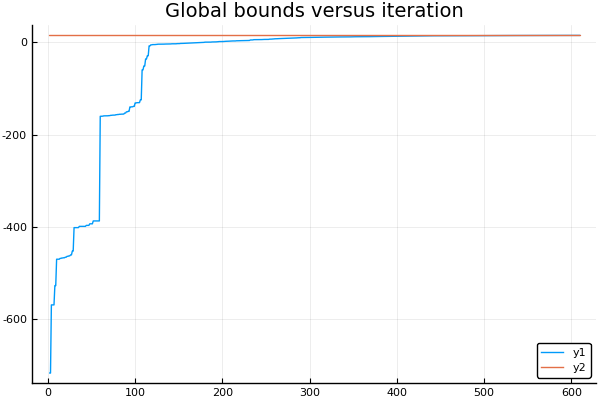

In [3]:
p1 = Plots.plot(iteration_number, bounds_data, title="Global bounds versus iteration")

### Plotting the bounds versus solution time

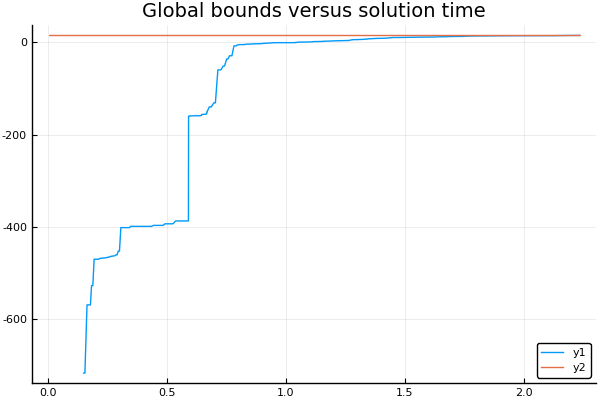

In [4]:
p2 = Plots.plot(solution_time, bounds_data, title="Global bounds versus solution time")

### Plotting nodes in stack versus iteration

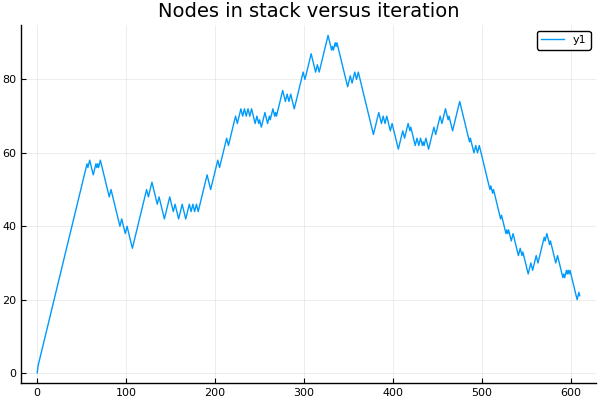

In [5]:
p3 = Plots.plot(iteration_number, node_count, title="Nodes in stack versus iteration")

### Plotting absolute and relative gaps versus iteration

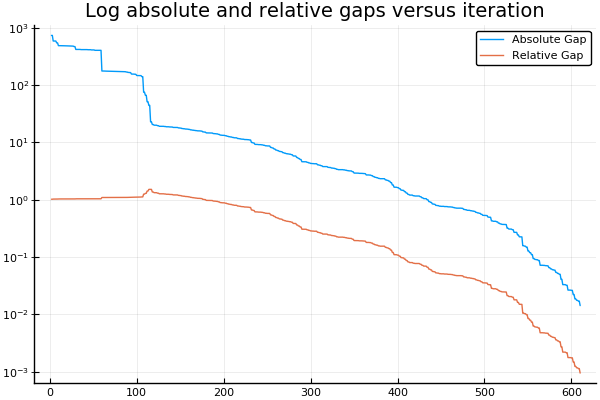

In [6]:
p4 = Plots.plot(iteration_number, abs_gap, title="Log absolute and relative gaps versus iteration", yscale = :log10, lab="Absolute Gap")
Plots.plot!(iteration_number, rel_gap, lab="Relative Gap")

### References
1. Kevin D. Dorfman and Prodromos Daoutidis (2017). Numerical Methods with Chemical Engineering Applications. Cambridge University Press. ISBN 9781108107839
2. Bäck, Thomas (1995). Evolutionary algorithms in theory and practice : evolution strategies, evolutionary programming, genetic algorithms. Oxford: Oxford University Press. ISBN 0-19-509971-0